In [ ]:
%matplotlib inline

import gymnasium as gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [ ]:
env = BlackjackEnv()

In [59]:
nA = 10
epsilon = 0.01
(epsilon/nA)*np.ones(nA)

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001])

In [60]:
np.ones(nA, dtype=float) * epsilon / nA

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001])

In [ ]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        # Implement this!
        best_action = np.argmax(Q[observation])

        response_probability = (epsilon/nA)*np.ones(nA)
        response_probability[best_action] += 1-epsilon


        
        return response_probability







    return policy_fn

# unit test for make_epsilon_greedy_policy:


# for 

Q = defaultdict(lambda: np.zeros(env.action_space.n))

Q

In [ ]:
# Q = defaultdict(lambda: np.zeros(10))

# Q['9'][7] +=1
# Q['9'][7] +=1
# Q['9']

In [ ]:
# Q = defaultdict(lambda: np.zeros(10))

# Q['0'][4] = 1

# Q['1']

## Learning points in the following exercise:

### To outline different ways to go through an episode, where the signal to stop is when the environment returns 'done' as 'true'

### Note that if there is a possibility that the epsiode can go on without reaching an end, i.e. when the environment can be trapped in a loop, the algorithm might never end.

### inner loop:
note that we cannot update the average return across episodes (outer loop) until each episode has ended (i.e until the inner loop has ended)

In [ ]:
            # start adding the rewards for each state-action pairs
            # we need also to record the accum discount fact for that pairs:

            
            # accum_reward, accum_discount = state_action_return_and_factor[observation][action]
            # new_accum_discount = discount_factor*accum_discount
            # state_action_return_and_factor[observation][action] = np.array( [accum_reward+ new_accum_discount*reward, new_accum_discount])


In [ ]:
# testing_dict = {(4,5):8, (5,6): 9}
# testing_dict[(4,5)]

In [67]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n)) # all action-values are started to be zero
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # Implement this!

    ## loop for the specified number of episodes:
    for n in range(num_episodes):
        if n % 5000 == 0:
            print("\rEpisode {}/{}.".format(n, num_episodes), end="")
            sys.stdout.flush()

        
        # 2. generate an episode using the policy (to be iterated) so far:
        
        # start by reseting the env:
        observation = env.reset()

       
        state_action_reward_list = []
        while True:
            # select an action according to the (possibly stochastic) policy
            action = np.argmax(np.random.multinomial(1, policy(observation)))
            # print('policy(observation)', policy(observation))
            # print('action is', action)

            # the environment takes the action and give a new state (observation)
            # , reward, and 
            new_observation, reward, done, _ = env.step(action)

            # add this state-action and resulting reward to list:
            state_action_reward_list.append((observation, action,reward))

            observation = new_observation



            # check whether the episode has ended:
            if done:
                break


        


        # 3.after finishing one episode:
        # 3.1 update Q:
            
        # temporary dictionary container for the obs, action pairs that appeared,
        temporary_dict_state_action_to_sampled_return = dict()
        #3.1.1 Calculate return for each appeared state-action pairs, from back to forth
        sampled_return_of_state_action = 0

        for obs, action, reward in reversed(state_action_reward_list):
            sampled_return_of_state_action = reward + discount_factor*sampled_return_of_state_action # verify: starting from the last, 2nd last, etc

            # update the value (sampled return) of (obs,action)
            # any exisiting values will be over-written, so no checking (as in the book) needed to be checked (??)
            temporary_dict_state_action_to_sampled_return[(obs, action)] = sampled_return_of_state_action

            
        
        

        # update returns_sum (a dictionary with (state, actions) as keys, and corresponding returns sums (over all episodes) as value)
        
        for (obs, action) in temporary_dict_state_action_to_sampled_return.keys():
            returns_sum[(obs, action)] += temporary_dict_state_action_to_sampled_return[(obs, action)]
            returns_count[(obs, action)] += 1
        
        #3.1.3 update: Q
        for (obs, action) in returns_sum.keys():
            assert (obs, action) in returns_count.keys(), 'check returns_count code ! '
            Q[obs][action] = returns_sum[(obs, action)]/returns_count[(obs, action)]
        

            
        
        # 3.2 improve the policy by epsilon-greedy:
        
            


    
    
    return Q, policy

In [68]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

Episode 495000/500000.

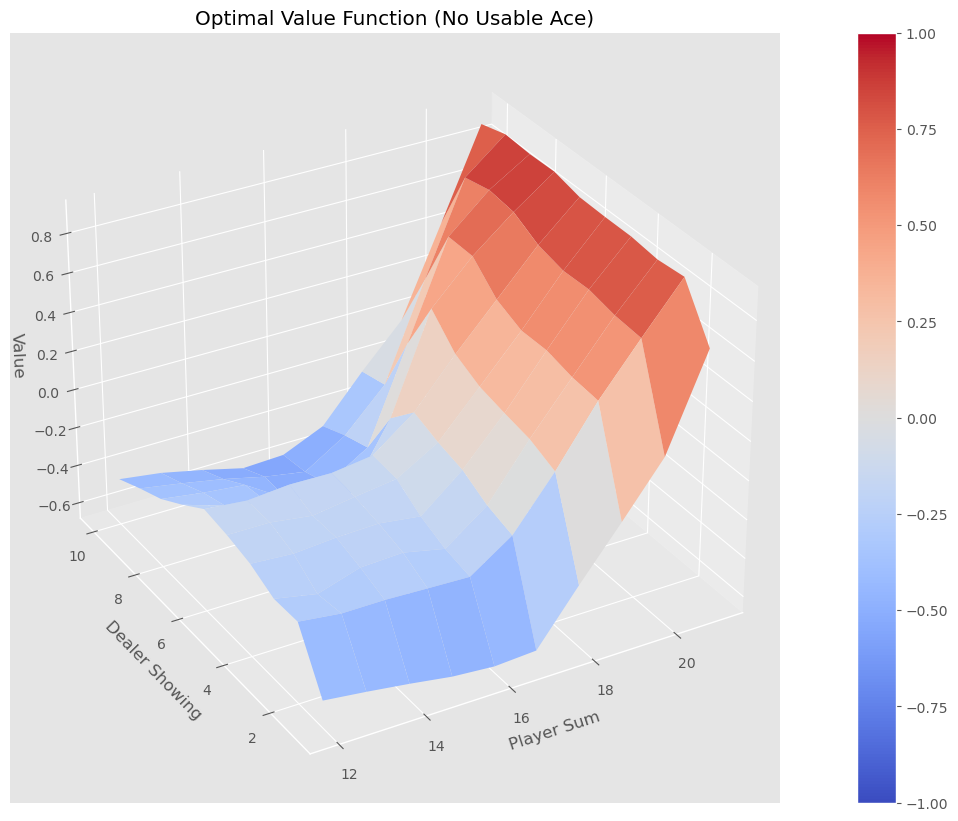

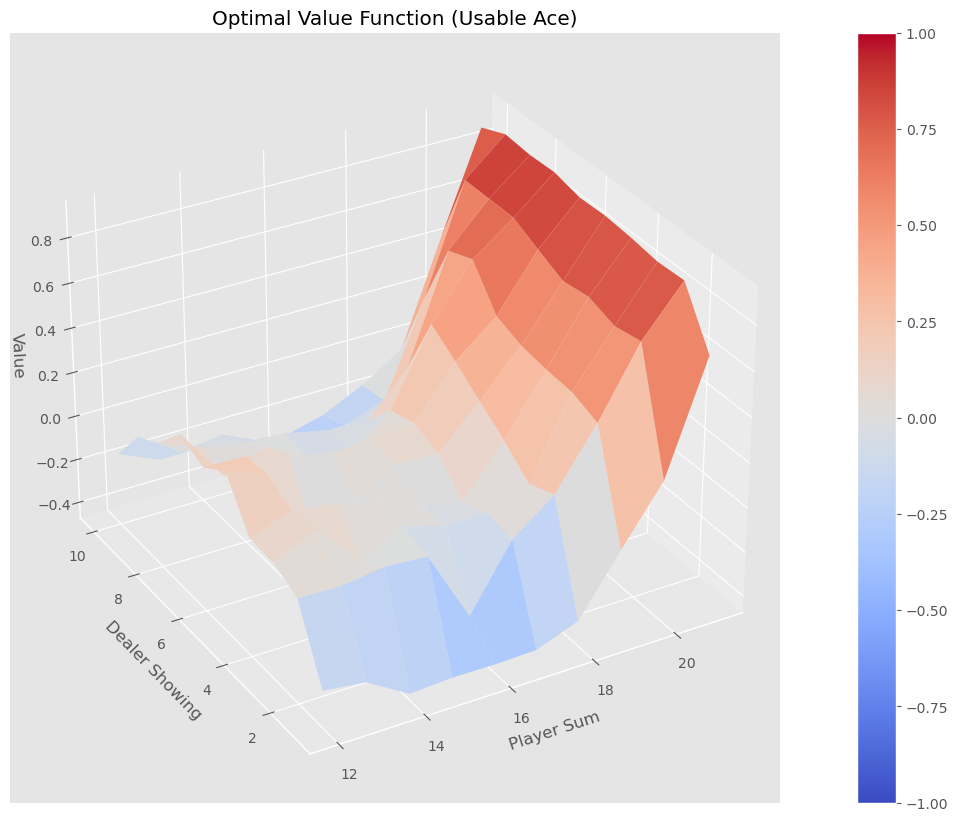

In [69]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")

## Try with using more episodes:



In [70]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=5000000, epsilon=0.1)

Episode 335000/5000000.

In [ ]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")